# RedditStats
This analysis concern the publishment statistic of the **dataisbeautiful** subreddits, a wonderful place where evryone can exchange opinions, suggestions and whatever else about their own projects. 

## Dataset
This dataset contains everything we need to get information from a post:
- id
- title 
- score
- author
- authorfalirtext
- removed_by
- totalawardsreceived
- awarders
- created_utc
- full_link
- num_commnets
- over_18

Thanks to Raphael Fontes for this csv. You can watch other tasks on <a href="https://www.kaggle.com/unanimad/dataisbeautiful">Kaggle</a>.


## Questions
1) What is the average of titles' lenght? <br />
2) Who are the authors with more posts? <br />
3) Who mostly removes posts? <br />
4) Which is the trend score? <br />
5) Are there more over 18 or under 18?  <br />
6) Which are the most used words? <br />

## Let's start
First of all, we need to import all the modules, in particular Pandas and Numpy for the data manipulation, then Matplotlib and Seaborn for the data visualization. Datetime and dateutil will be useful for working on datas. PIL and wordcloud will need for the last question. 

In [78]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

import datetime
from datetime import date

Now we need to import our csv

In [2]:
df = pd.read_csv('CSV/r_dataisbeautiful_posts.csv')

c:\users\francesco\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


We'll get into this error: "Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False." <br /><br /> We need to add just the **dtype**, as following

In [3]:
df = pd.read_csv('CSV/r_dataisbeautiful_posts.csv', dtype="unicode")

This is the dataset's first row

In [4]:
df.head(1)

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,hbyv2e,[OC] How Bar Chart Race Animation Can be Creat...,1,Tom10AE,NaN,NaN,0.0,[],1592565317,https://www.reddit.com/r/dataisbeautiful/comme...,0,False


### 1) What is the average of titles' lenght? 
Firstly, we add another column with every title's length, and just then we can calculate the average.

In [5]:
df['title_length'] = df['title'].astype(str).apply(len)
df['title_length'].mean()

63.112485113463954

So the average title's length is around 63 characters.

### 2) Who are the authors with more posts?
We can respond to this question with a group by and a consecutive barchart.

In [6]:
top10authors = df.groupby(["author"]).count()["id"].sort_values(ascending=False)[:10]
top10authors

author
[deleted]      28596
jimrosenz       2293
OverflowDs       484
RAGTIMEMA        325
rhiever          323
sofl96           314
caobanlong       314
BoMcCready       263
profcyclist      246
flerlagekr       241
Name: id, dtype: int64

As we can see, we need to delete all the columns with "[deleted]" as the author's name. We can do that thanks to the operator ~ that drop all the columns with that specific pattern.

In [7]:
to_drop = ['[deleted]']
top10authors = df[~df['author'].isin(to_drop)].groupby(["author"]).count()["id"].sort_values(ascending=False)[:10]
top10authors

author
jimrosenz        2293
OverflowDs        484
RAGTIMEMA         325
rhiever           323
caobanlong        314
sofl96            314
BoMcCready        263
profcyclist       246
flerlagekr        241
AutoModerator     240
Name: id, dtype: int64

Now we can plot our result

Text(0, 0.5, '')

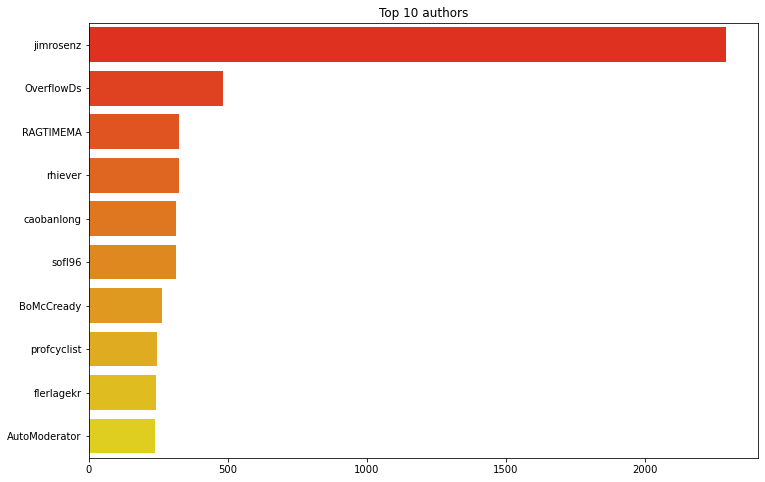

In [8]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top10authors.index, x=top10authors.values, palette="autumn").set_title("Top 10 authors")
plt.xlabel(None)
plt.ylabel(None)

### 3) Who mostly removes posts?
This time we need to take care of "NaN" and "deleted", so as before let's add these two string in our list and clean the dataset. 

Text(0, 0.5, '')

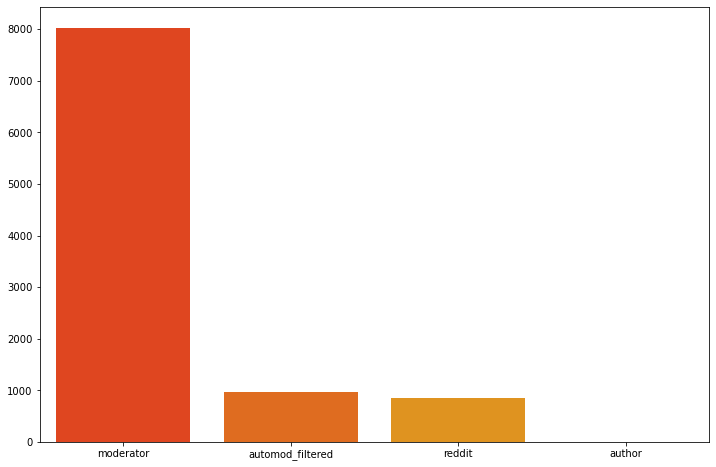

In [9]:
to_drop = ['NaN','deleted']
deleted = df[~df['removed_by'].isin(to_drop)].groupby(["removed_by"]).count()["id"].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=deleted.index, y=deleted.values, palette="autumn")
plt.xlabel(None)
plt.ylabel(None)

### 4) Which is the trend score? 
We can use a searbon.distplot for showing that trend.Firstly we have to check if there is any null value, and then we'll can go on. 

In [52]:
df['score'].isnull().sum()

0

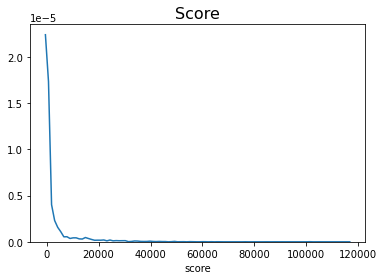

In [55]:
sns.distplot(df['score'], hist=False)
plt.title('Score', fontsize=16)
plt.show()

### 5) Are there more over 18 or under 18? 
The relevant record is "over_18" that accept just True or False, so True means over_18, and false under_18. 

In [56]:
df['over_18'].isnull().sum()

0

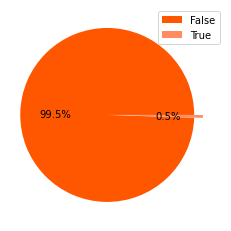

In [69]:
df_over = df.groupby('over_18')['over_18'].count()

cs=['#FF5700','#FF8b60']
explode =(0.1,0)
plt.pie(df_over, colors=cs, autopct='%.1f%%',explode=explode)
plt.legend(df_over.index, loc="upper right")

### 6) Which are the most used words?
As many knows, there is an amazing component called "WordCloud" that shows the words in a sort of cloud that zoom in most frequently words. I changed the default color thanks to the "color_func" function. 

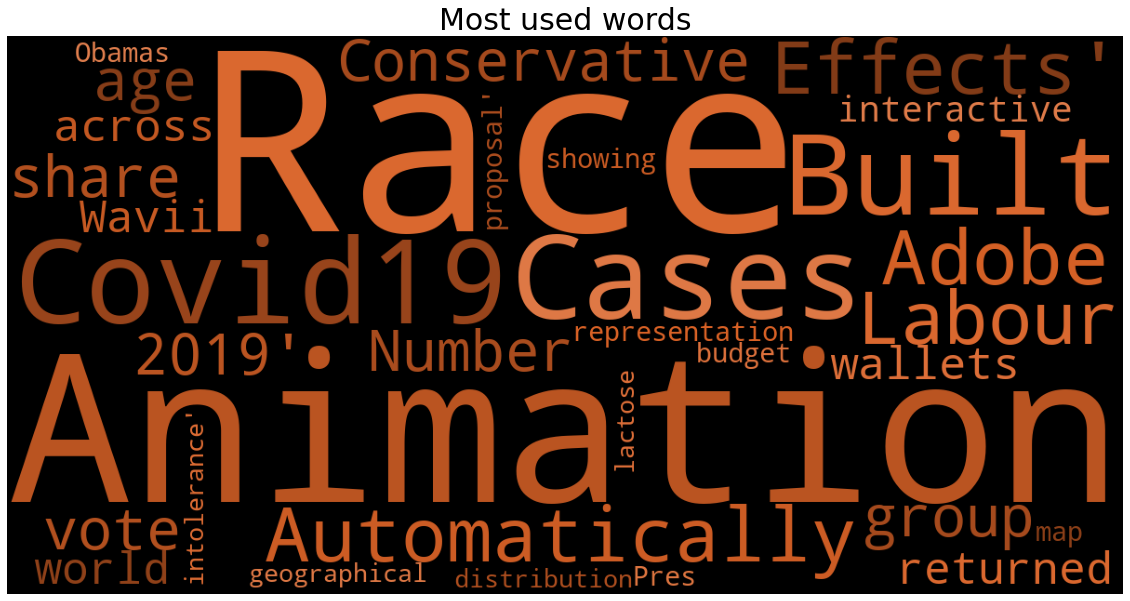

In [135]:
import random
def color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(20, 70%%, %100d%%)" % random.randint(30, 60)

plt.figure(figsize=(20, 20))
wc = WordCloud(width=1200, height=600,max_words=100, 
               min_word_length=3, min_font_size=3).generate(''.join(str(df.title.values)))

plt.imshow(wc.recolor(color_func=color_func, random_state=3))
plt.axis('off')
plt.title('Most used words', fontsize="30")
plt.show()